In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [8]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

#Datasets as numpy arrays
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [9]:
#defining X and y variables from training and testing data
#converting y to categorical values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=26)
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=26)

#Reshaping X data for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [10]:
#CNN model as per specifications
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation = 'softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

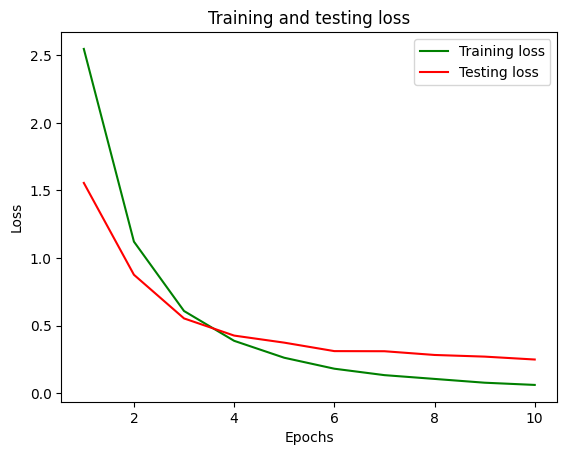

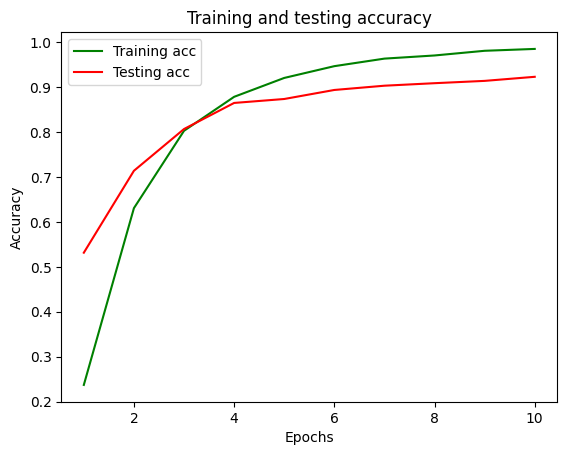

In [11]:
#compiling the model
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Testing acc')
plt.title('Training and testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Model predictions
predictions_probabilities = model.predict(X_test)
predictions = np.argmax(predictions_probabilities, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy Score = ', accuracy)


225/225 [==============================] - 1s 6ms/step
Accuracy Score =  0.9226157278304518


In [13]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

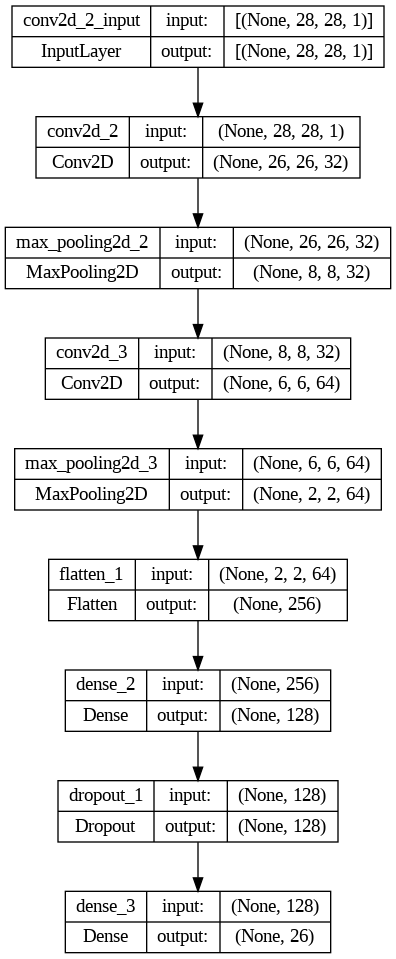

In [14]:
# Generate a plot of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
#CNN model with dropout = 0.3
model_new = Sequential()

model_new.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_new.add(MaxPooling2D(pool_size = (3, 3)))
model_new.add(Dropout(0.3))
model_new.add(Conv2D(64, (3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size = (3, 3)))
model_new.add(Dropout(0.3))
model_new.add(Flatten())
model_new.add(Dense(128, activation = 'relu'))
model_new.add(Dropout(0.2))
model_new.add(Dense(26, activation = 'softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 64)         

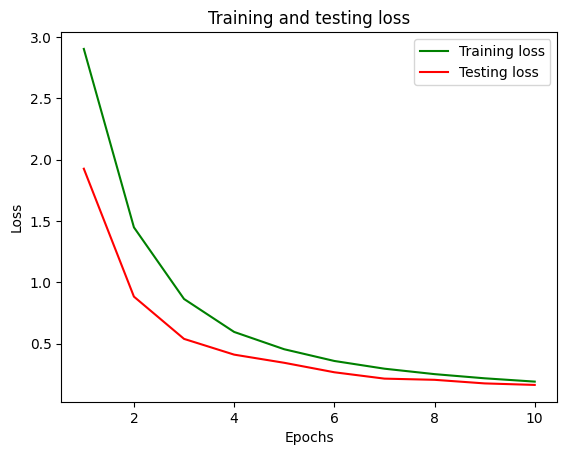

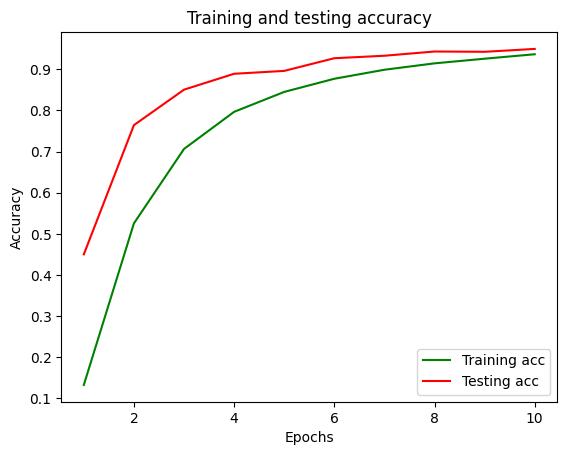

In [16]:
#compiling the model
model_new.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model_new.summary()

history = model_new.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Testing acc')
plt.title('Training and testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Model predictions
predictions_probabilities = model_new.predict(X_test)
predictions = np.argmax(predictions_probabilities, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy Score = ', accuracy)


# Confusion matrix
cm = confusion_matrix(y_test, predictions)
# print('Confusion Matrix = ', cm)

225/225 [==============================] - 1s 5ms/step
Accuracy Score =  0.9493865030674846
